# Scaling Our Data

In this notebook we're going to explore different types of scaling and prove to ourselves that it actually matters.

We can do it with both the boston housing data and the MNIST data we used before.

In [1]:
import numpy as np
from keras.datasets import boston_housing, mnist
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## Let's start with the Boston Housing Data

In [2]:
(X_train, y_train),(X_test, y_test) =  boston_housing.load_data()

In [3]:
## I like to put things into pandas dataframe, for a lot of reasons.  Here I do it just because it will make the dataset print out nicely.
cols = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE",'DIS','RAD', 'TAX','PTRATIO','B','LSTAT']
X_traindf = pd.DataFrame(X_train, columns= cols)
X_traindf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [4]:
X_traindf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


## Scale the variables with Standard Scaler

We will standardize our data by scaling it and removing the mean and variance.  

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_traindf)
X_train_scaledf = pd.DataFrame(X_train_scale, columns = cols) #so we can check the stats with describe
X_test_scale = scaler.transform(X_test)

In [7]:
X_train_scaledf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.015414e-16,1.099231e-17,1.743380e-15,-1.266863e-16,-5.253773e-15,6.414149e-15,2.984411e-16,4.946538e-16,1.126711e-17,-1.981363e-16,2.366864e-14,5.956800e-15,6.139204e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.051005e-01,-4.836155e-01,-1.564696e+00,-2.568327e-01,-1.471269e+00,-3.817250e+00,-2.369042e+00,-1.287503e+00,-9.715693e-01,-1.311311e+00,-2.673752e+00,-3.771101e+00,-1.519664e+00
25%,-3.969615e-01,-4.836155e-01,-8.782218e-01,-2.568327e-01,-8.908055e-01,-5.534305e-01,-8.433882e-01,-8.202251e-01,-6.262491e-01,-7.636737e-01,-5.692381e-01,2.116008e-01,-8.075036e-01
50%,-3.766520e-01,-4.836155e-01,-2.079167e-01,-2.568327e-01,-1.652266e-01,-9.674263e-02,3.400464e-01,-2.949009e-01,-5.111423e-01,-4.567563e-01,2.839433e-01,3.879673e-01,-1.857436e-01
75%,-7.617386e-03,4.296024e-02,1.028326e+00,-2.568327e-01,6.286420e-01,4.823165e-01,8.990647e-01,6.794540e-01,1.675886e+00,1.565287e+00,7.844764e-01,4.401777e-01,6.005999e-01
max,9.234847e+00,3.728990e+00,2.445374e+00,3.893584e+00,2.677335e+00,3.467186e+00,1.110488e+00,3.437406e+00,1.675886e+00,1.836097e+00,1.603531e+00,4.480771e-01,3.482019e+00


## Describe after the scaling

It's a bit confusing to read above, because of the scientific notation, but what you should see is that the mean is 0 and the standard deviation (std) is 1.0.

This is what standardized scaling does.
Let's look at it another way.  We can plot the distributions

## Plot the distributions before and after scaling.

Here I will plot the distributions before scaling and afterwards.
Before scaling is on the LEFT side, and after is on the RIGHT side

C:\Users\Jacob\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jacob\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jacob\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

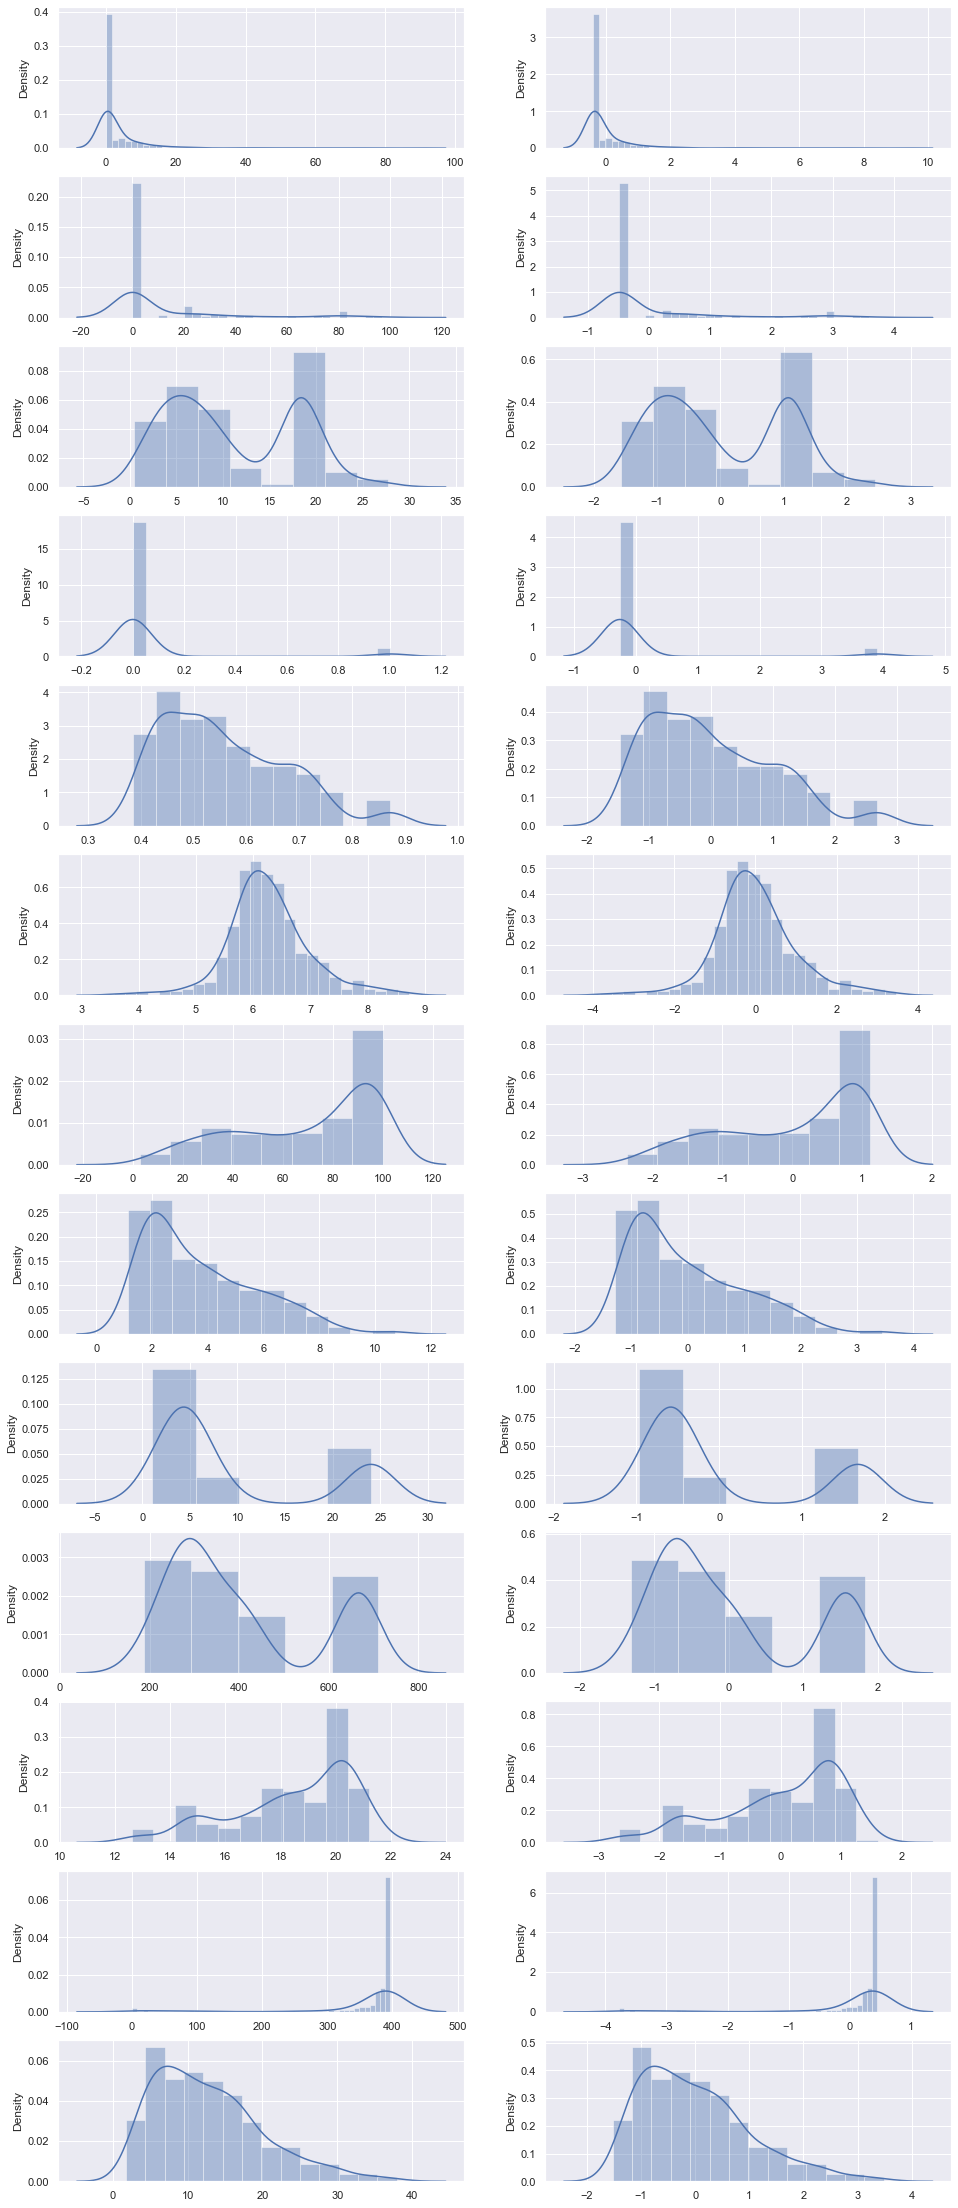

In [8]:
fig, ax = plt.subplots(13, 2, figsize = (16,40))

for i in range(13):
    for j in range (2):
        if j == 0:
            sns.distplot(X_train[:,i], ax = ax[i,j])
        else:
            sns.distplot(X_train_scale[:,i], ax = ax[i,j])

##  The distributions stay the same

But the scale changes.  This is the big takeway.  We don't actually affect the distribution of the data, it stays the same and relative to itself.  What does change is the scale of the x-axis, after standardization it will be centered on 0.  This creates a 0-mean for the feature, and the standard deviation will be close to 1.0.

Let's compare this with a MinMax scaler

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
one_scale = MinMaxScaler(feature_range=(0,1))
X_train_min_max = one_scale.fit_transform(X_train)
X_train_min_maxdf = pd.DataFrame(X_train_min_max)
X_train_min_maxdf.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.042023,0.114802,0.390192,0.061881,0.354642,0.524028,0.680851,0.272493,0.366982,0.416632,0.625105,0.893800,0.303830
std,0.103864,0.237677,0.249681,0.241238,0.241344,0.137449,0.287751,0.211907,0.378190,0.318116,0.234083,0.237307,0.200181
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000844,0.000000,0.171188,0.000000,0.139918,0.448054,0.438465,0.098897,0.130435,0.173996,0.492021,0.943952,0.142384
50%,0.002951,0.000000,0.338343,0.000000,0.314815,0.510747,0.778579,0.210079,0.173913,0.271511,0.691489,0.985753,0.266694
75%,0.041233,0.125000,0.646628,0.000000,0.506173,0.590240,0.939238,0.416295,1.000000,0.913958,0.808511,0.998128,0.423910
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##  The MinMax Scaler makes everything min and max.  Above we see the min is 0 and the max is 1.0

Let's take a look at the plots of min-maxed data.

C:\Users\Jacob\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jacob\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jacob\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

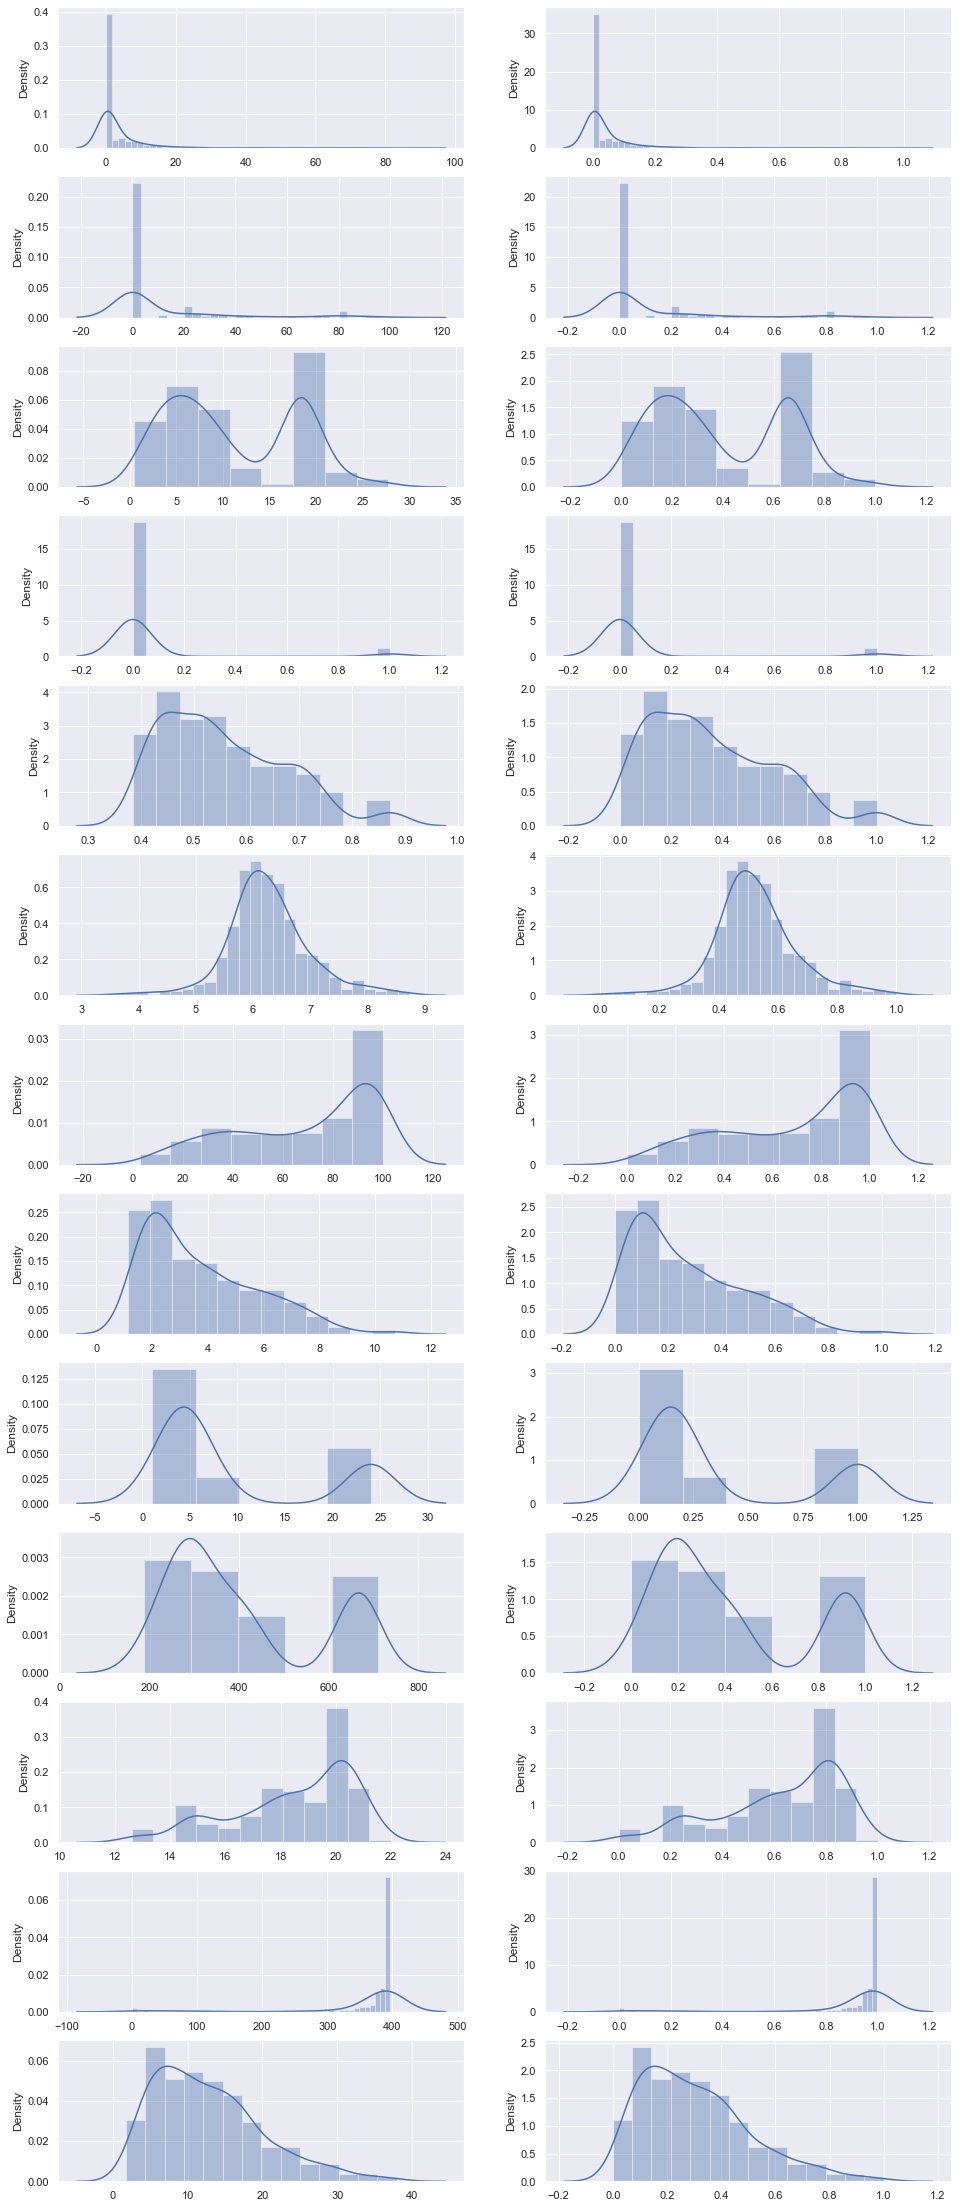

In [11]:
fig, ax = plt.subplots(13, 2, figsize = (16,40))

for i in range(13):
    for j in range (2):
        if j == 0:
            sns.distplot(X_train[:,i], ax = ax[i,j])
        else:
            sns.distplot(X_train_min_max[:,i], ax = ax[i,j])

## Again, the distribution is exactly the same, but the scale has changed.

So, which one is better?  Well that of course... depends.  Most of the time I'd recommend that you go with standard scaler, because it's called standard for a reason!  However, there will be times that you may need to think carefully about outliers and how they will be affected by your scaling process.  This is another lecture unto itself, but I will point you at one excellent article on the matter.

http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

Now, let's move on and see what happens to our model with and without scaling.

##  Let's build a simple model with scaling.

One important point -- you will notice that I will transform the test data, using a scaler that was `fit` on the training data.  I will talk about why I do this in the next unit, but it's a very important point.

In [12]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler(feature_range=(-1,1))

X_train_SS = scaler.fit_transform(X_train)
X_test_SS = scaler.transform(X_test)

X_train_MM = minmax_scaler.fit_transform(X_train)
X_test_MM = minmax_scaler.transform(X_test)


In [13]:
from keras import models
from keras import layers

In [14]:
def run_model (X_train, X_test, y_train, y_test):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))  # 1 output for regression, also no activation function!

    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics =['mse'])
    
    model.fit(X_train, y_train, batch_size=16, epochs= 100, verbose=0)
    
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print (test_loss)

In [15]:
run_model(X_train_SS, X_test_SS, y_train, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 17.1680 - mse: 17.1680
17.16800308227539


In [16]:
run_model(X_train_MM, X_test_MM, y_train, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 17.7153 - mse: 17.7153
17.7153263092041


# The standardized scaler seems to be helping a lot more in this case.

However, let's compare those both with NO scaling at all.

In [17]:
(X_train, y_train),(X_test, y_test) =  boston_housing.load_data()

In [18]:
run_model(X_train, X_test, y_train, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 30.7201 - mse: 30.7201
30.720109939575195


In [19]:
X_traindf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


## Other things to try:

Now, before you go ahead and swear that Standard scaling is the way to go here, consider -- is there a better min and max to choose?
Also, what about all those 0.0's in our feature columns? Those are basically non-information, why is that? Should we have chosen a better imputation model other than just leaving them at 0.0?  There are so many thoughts to have.  



# Scaling the MNIST

At this point we should think about what we have been doing on the MNIST until now.


Ignoring the `to_categorical` part (next video!) what do you think `/255` is doing?

your answer here: Converting all of the pixel data to be between 0 and 1

In [20]:
## mnist.load_data() will automatically download the dataset if you don't have it
(MNIST_train_X, MNIST_train_y), (MNIST_test_X, MNIST_test_y) = mnist.load_data()

In [21]:
MNIST_train_X = MNIST_train_X.reshape((60000, 28 * 28))
print("the mean : {}".format(np.mean(MNIST_train_X)))
print("the std : {}".format(np.std(MNIST_train_X)))

the mean : 33.318421449829934
the std : 78.56748998339798


In [22]:
MNIST_train_X_D255 = MNIST_train_X.astype('float32') / 255
print("the mean : {}".format(np.mean(MNIST_train_X_D255)))
print("the std : {}".format(np.std(MNIST_train_X_D255)))

the mean : 0.13066062331199646
the std : 0.30810776352882385


##  Let's compare to what Standard Scaler would do

In [23]:
scaler = StandardScaler()
MNIST_train_X_SS = scaler.fit_transform(MNIST_train_X.astype("float64"))
print("the mean : {}".format(np.mean(MNIST_train_X_SS)))
print("the std : {}".format(np.std(MNIST_train_X_SS)))

the mean : -2.1974863349995617e-18
the std : 0.9563162742140049


## Dividing by 255
Is intuitively scaling the pixels down to be smaller and within range of each other.  How important was this work for the accuracy on the MNIST?

How could we find out... ? Haha let's run more experiments!

Make a hypothesis, which do you think will be better, standard scaling vs /255?  

How much worse do you think the accuracy will get with NO scaling?

### your answers here:

(1) SS vs /255 : 

(2) accuracy with no scaling ? : 

In [24]:
MNIST_test_X = MNIST_test_X.reshape((10000, 28 * 28))
MNIST_test_X_D255 = MNIST_test_X.astype('float32') / 255
MNIST_test_X_SS = scaler.transform(MNIST_test_X.astype("float64"))

In [25]:
from keras.utils import to_categorical

MNIST_train_y = to_categorical(MNIST_train_y)
MNIST_test_y = to_categorical(MNIST_test_y)

In [26]:
def run_mnist(X_train, X_test, y_train, y_test):
    network = models.Sequential() #we'll stick to sequential for this course

    network.add(layers.Dense(512, activation='relu', input_shape=(784,)))  # Dense is the same as fully connected.
    network.add(layers.Dense(10, activation='softmax'))

    network.compile(optimizer='rmsprop',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

    network.fit(X_train, y_train, epochs=5, batch_size=128)
    test_loss, test_acc = network.evaluate(X_test, y_test)
    print('test_acc:', test_acc)

## The original data we've been running, Divide by 255

In [27]:
run_mnist(MNIST_train_X_D255, MNIST_test_X_D255, MNIST_train_y, MNIST_test_y)

Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 0.2586 - accuracy: 0.9243
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1050 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0691 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0498 - accuracy: 0.9848
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0659 - accuracy: 0.9811
test_acc: 0.9811000227928162


## The standard scaled data

In [28]:
run_mnist(MNIST_train_X_SS, MNIST_test_X_SS, MNIST_train_y, MNIST_test_y)

Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 0.2166 - accuracy: 0.9392
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0926 - accuracy: 0.9736
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0639 - accuracy: 0.9828
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0435 - accuracy: 0.9878
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1589 - accuracy: 0.9750
test_acc: 0.9750000238418579


## No scaling at all

In [29]:
run_mnist(MNIST_train_X, MNIST_test_X, MNIST_train_y, MNIST_test_y)

Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 5.7749 - accuracy: 0.8991
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.6827 - accuracy: 0.9538
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.4534 - accuracy: 0.9653
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3847 - accuracy: 0.9724
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.6751 - accuracy: 0.9679
test_acc: 0.9678999781608582


## Conclusions

What did you learn about scaling?

### Your answer here :


here :